In [1]:
import os

In [2]:
os.chdir("/content/drive/My Drive/phd/datasets/cancers/breast")

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("mainTable.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, ENSG00000000971 to ENSG00000273474
Columns: 1222 entries, 87fcecde-b317-4518-bea1-cc8d14a18107.FPKM.txt.gz to 8682197b-7b3d-4d3f-8f3d-8be702aa02fd.FPKM.txt.gz
dtypes: float64(1222)
memory usage: 28.0+ MB


In [6]:
from sklearn.decomposition import NMF

In [92]:
model = NMF(n_components=10, init="random", shuffle=True)

In [86]:
X = np.log2(df.values+1)

In [93]:
model.fit(X.T)

NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=None, shuffle=True, solver='cd', tol=0.0001,
    verbose=0)

In [94]:
model.components_

array([[0.31964864, 0.14999632, 0.40274294, ..., 0.04447862, 0.31181501,
        0.05145015],
       [0.84461958, 0.62444905, 0.83857125, ..., 0.        , 0.10802997,
        0.01140315],
       [0.01396136, 0.66752638, 1.04620055, ..., 0.20917248, 0.        ,
        0.11887601],
       ...,
       [0.37794232, 0.50243741, 0.45504994, ..., 0.57744347, 0.29976176,
        0.48568217],
       [0.1297906 , 0.        , 0.91350011, ..., 0.42907495, 0.        ,
        0.4305261 ],
       [0.02704458, 1.1314443 , 1.77687616, ..., 0.20426351, 1.50004783,
        0.        ]])

In [95]:
import seaborn as sns
import numpy as np

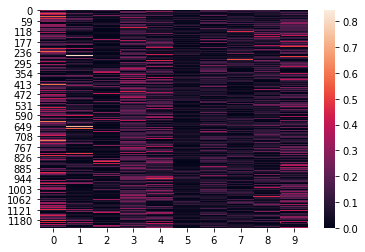

In [106]:
sns.heatmap(W)

In [104]:
W = model.transform(X.T)
W = np.divide(W.T,W.sum(1)).T

In [108]:
os.system("mkdir nmf")

0

In [109]:
df_topic_distr = pd.DataFrame(index=df.columns, columns = ["Topic %d"%(t+1) for t in range(10)], data=W)

df_topic_distr.to_csv("nmf/nmf_level_0_topic-dist.csv")

In [116]:
H = model.components_.T
H = np.divide(H,H.sum(0))

In [119]:
df_word_distr = pd.DataFrame(index=df.index, columns = ["Topic %d"%(t+1) for t in range(10)], data=H)

df_word_distr.to_csv("nmf/nmf_level_0_word-dist.csv")

In [129]:
df_clusters = pd.DataFrame()
for c in range(10)[::-1]:
    mask = W.argmax(1)==c
    df_clusters.insert(0, "Cluster %d"%(c+1), np.concatenate([df.columns[mask],np.repeat(np.nan,len(df.columns)-mask.sum())]))
df_clusters.dropna(how="all", axis=0, inplace=True)
df_clusters.to_csv("nmf/nmf_level_0_clusters.csv", index=False, header=True)

In [133]:
df_topics = pd.DataFrame()
for c in range(10)[::-1]:
    mask = H.argmax(1)==c
    df_topics.insert(0, "Topic %d"%(c+1), np.concatenate([df.index[mask],np.repeat(np.nan,len(df.index)-mask.sum())]))
df_topics.dropna(how="all", axis=0, inplace=True)
df_topics.to_csv("nmf/nmf_level_0_topics.csv", index=False, header=True)

In [138]:
for level, n_cl in zip(range(3), [149,19,8]):
    print(level, n_cl)
    model = NMF(n_components=n_cl, init="random", shuffle=True)
    model.fit(X.T)

    W = model.transform(X.T)
    W = np.divide(W.T,W.sum(1)).T

    H = model.components_.T
    H = np.divide(H,H.sum(0))

    df_topic_distr = pd.DataFrame(index=df.columns, columns = ["Topic %d"%(t+1) for t in range(n_cl)], data=W)
    df_topic_distr.insert(0,"i_doc", range(df_topic_distr.shape[0]))
    df_topic_distr.index.name="doc"
    df_topic_distr.to_csv(f"nmf/nmf_level_{level}_topic-dist.csv")

    df_word_distr = pd.DataFrame(index=df.index, columns = ["Topic %d"%(t+1) for t in range(n_cl)], data=H)

    df_word_distr.to_csv(f"nmf/nmf_level_{level}_word-dist.csv")

    df_clusters = pd.DataFrame()
    for c in range(n_cl)[::-1]:
        mask = W.argmax(1)==c
        df_clusters.insert(0, "Cluster %d"%(c+1), np.concatenate([df.columns[mask],np.repeat(np.nan,len(df.columns)-mask.sum())]))
    df_clusters.dropna(how="all", axis=0, inplace=True)
    df_clusters.to_csv(f"nmf/nmf_level_{level}_clusters.csv", index=False, header=True)

    df_topics = pd.DataFrame()
    for c in range(n_cl)[::-1]:
        mask = H.argmax(1)==c
        df_topics.insert(0, "Topic %d"%(c+1), np.concatenate([df.index[mask],np.repeat(np.nan,len(df.index)-mask.sum())]))
    df_topics.dropna(how="all", axis=0, inplace=True)
    df_topics.to_csv(f"nmf/nmf_level_{level}_topics.csv", index=False, header=True)

0 149
1 19
2 8
